<a href="https://colab.research.google.com/github/Ezequiel-Maldonado87/DataScience-2024/blob/main/PEntrega/ProyectoDS_ParteI_Maldonado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/saludfumadores.csv', sep =';')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,25,175,90,100.0,1.0,1.0,1.0,1.0,146.0,...,129.0,118.0,16.2,1.0,0.8,17.0,20.0,21.0,1.0,N
1,Male,75,155,70,100.0,0.9,0.7,1.0,1.0,130.0,...,57.0,214.0,14.8,3.0,0.9,19.0,41.0,30.0,1.0,N
2,Male,35,165,90,100.0,0.9,0.9,1.0,1.0,136.0,...,103.0,167.0,16.1,1.0,0.7,27.0,32.0,71.0,3.0,Y
3,Male,35,175,95,100.0,1.2,1.2,1.0,1.0,140.0,...,108.0,72.0,15.9,1.0,1.0,62.0,145.0,63.0,3.0,Y
4,Male,65,160,80,100.0,0.7,0.5,1.0,1.0,172.0,...,97.0,301.0,13.6,1.0,0.9,48.0,54.0,176.0,1.0,N


**EL DATASET SELECCIONADO CONTIENE DATOS CON LOS VALORES CLINICOS DE PACIENTES, DONDE ALGUNOS CONSUMEN ALCOCHOL Y TABACO. LA BASE DEL ANALISIS ES TRATAR DE IDENTIFICAR, ENTENDER, COMO INFLUYE EL CONSUMO DE ESTAS SUSTANCIAS EN CADA UNO DE LOS VALORES.**


Nomenclatura de los datos:

*   Sexo: Masculino - femenino
*   edad : edad
*   altura : altura del paciente
*   peso : peso del paciente
*   cintura : Cintura en Cm
*   vista_izquierda :Graduacion ojo izquierdo
*   vista_derecha : Graduacion ojo derecho
*   escucha_izquierda : audición izquierda, 1 (normal), 2 (anormal)
*   escucha_derecha : audición correcta, 1 (normal), 2 (anormal)
*   PAS : Presión arterial sistólica [mmHg]
*   PAD : Presión arterial diastólica [mmHg]
*   BLDS : BLDS o FSG (glucosa en sangre en ayunas) [mg/dL]
*   tot_chole : colesterol total[mg/dL]
*   HDL_cole : Colesterol HDL[mg/dL]
*   col_LDL :Colesterol LDL[mg/dL]
*   triglicéridos : triglicéridos [mg/dL]  
*   hemoglobina : hemoglobina[g/dL]
*   proteína_orina : proteína en orina, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
*   suero de creatinina : creatinina sérica (sangre) [mg/dL]
*   SGOT_AST : SGOT(Glutamato-oxalacetato transaminasa) AST(Aspartato transaminasa)[UI/L]
*   ESGOT_ALT : ALT(Alanina transaminasa)[UI/L]
*   gamma_GTP : y-glutamil transpeptidasa[UI/L]
*   SMK_stat_type_cd : Estado de fumar, 1 (nunca), 2 (solía fumar pero lo dejó), 3 (fuma)





In [ ]:
#Renombrando las columnas
df = df.rename(columns={"sex": "Sexo", "age":"Edad", "height":"Altura", "weight":"Peso", "waistline":"Cintura","sight_left":"Vista_izq","sight_right":"Vista_der", "hear_left":"Audicion_izq","hear_right":"Audicion_der","tot_chole":"Colest_total", "HDL_chole":"Colest_HDL", "LDL_chole":"Colest_LDL","triglyceride":"Trigliceridos", "hemoglobin":"Hemoglobina", "urine_protein":"Proteina_orina", "serum_creatinine":"SuerodeCreatinina","SMK_stat_type_cd":"Estado de fumador", "DRK_YN":"Consumo de alcohol"})
df.head()

,Sexo,Edad,Altura,Peso,Cintura,Vista_izq,Vista_der,Audicion_izq,Audicion_der,SBP,...,Colest_LDL,Trigliceridos,Hemoglobina,Proteina_orina,SuerodeCreatinina,SGOT_AST,SGOT_ALT,gamma_GTP,Estado de fumador,Consumo de alcohol
0,Male,25,175,90,100.0,1.0,1.0,1.0,1.0,146.0,...,129.0,118.0,16.2,1.0,0.8,17.0,20.0,21.0,1.0,N
1,Male,75,155,70,100.0,0.9,0.7,1.0,1.0,130.0,...,57.0,214.0,14.8,3.0,0.9,19.0,41.0,30.0,1.0,N
2,Male,35,165,90,100.0,0.9,0.9,1.0,1.0,136.0,...,103.0,167.0,16.1,1.0,0.7,27.0,32.0,71.0,3.0,Y
3,Male,35,175,95,100.0,1.2,1.2,1.0,1.0,140.0,...,108.0,72.0,15.9,1.0,1.0,62.0,145.0,63.0,3.0,Y
4,Male,65,160,80,100.0,0.7,0.5,1.0,1.0,172.0,...,97.0,301.0,13.6,1.0,0.9,48.0,54.0,176.0,1.0,N


In [ ]:
#Obteniendo descripcion de los datos.
df.describe()

,Edad,Altura,Peso,Cintura,Vista_izq,Vista_der,Audicion_izq,Audicion_der,SBP,DBP,...,Colest_HDL,Colest_LDL,Trigliceridos,Hemoglobina,Proteina_orina,SuerodeCreatinina,SGOT_AST,SGOT_ALT,gamma_GTP,Estado de fumador
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,...,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,47.590782,162.248091,63.269291,81.177603,0.981844,0.981060,1.031425,1.030500,122.386317,76.037713,...,57.044876,113.048413,132.368642,14.225607,1.095114,0.859802,25.931262,25.723922,36.932137,1.610045
std,14.179667,9.276408,12.532689,9.611837,0.612793,0.615506,0.174466,0.171961,14.505570,9.932545,...,32.213519,38.639356,106.441522,1.579527,0.436114,0.445456,18.614030,24.531428,48.965710,0.818828
min,20.000000,130.000000,30.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,2.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.200000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,129.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,9490.000000,20.900000,6.000000,81.000000,1911.000000,2309.000000,999.000000,3.000000


**GRAFICO 1 - ¿De la muestra de la base que cantidad de pacientes consumen Tabaco?**
*Nomenclatura: 1 (nunca), 2 (solía fumar pero lo dejó), 3 (fuma)*

<Axes: xlabel='Estado de fumador', ylabel='count'>

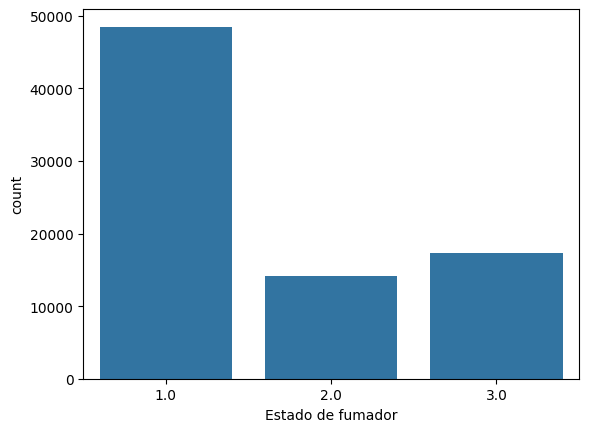

In [ ]:
plt.figure()
sns.countplot(data = df,
              x = 'Estado de fumador')

Los pacientes de la muestra que consumen tabaco representan el 21,2% de la base.


**GRAFICO 2 - En el siguiente grafico observamos como se distribuye el peso en la muestra.**

<Axes: xlabel='Peso', ylabel='Count'>

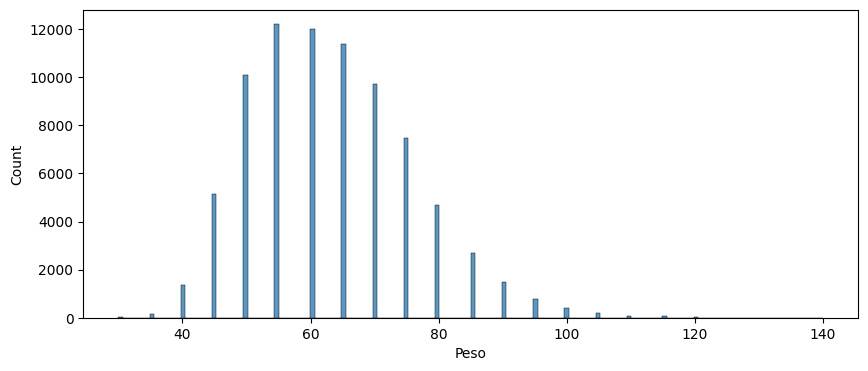

In [ ]:
plt.figure(figsize = (10,4
                    ))
sns.histplot(data = df,
                x = 'Peso')

**GRAFICO 3 y 4 - ¿Existe relacion entre el consumo de tabaco con el peso y centrimetros de cintura?**

<Axes: xlabel='Peso', ylabel='Cintura'>

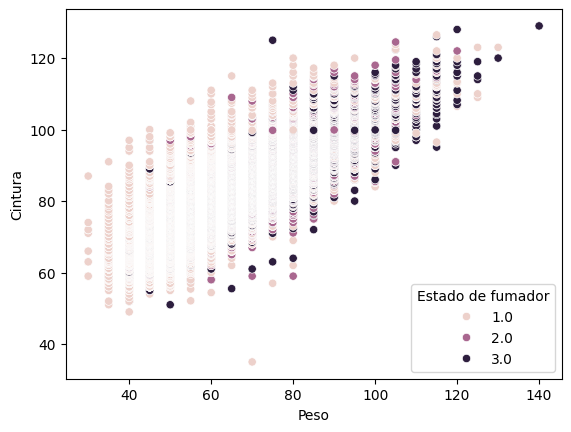

In [ ]:
sns.scatterplot(x="Peso", y="Cintura",hue="Estado de fumador", data=df)

<Axes: xlabel='Peso', ylabel='Cintura'>

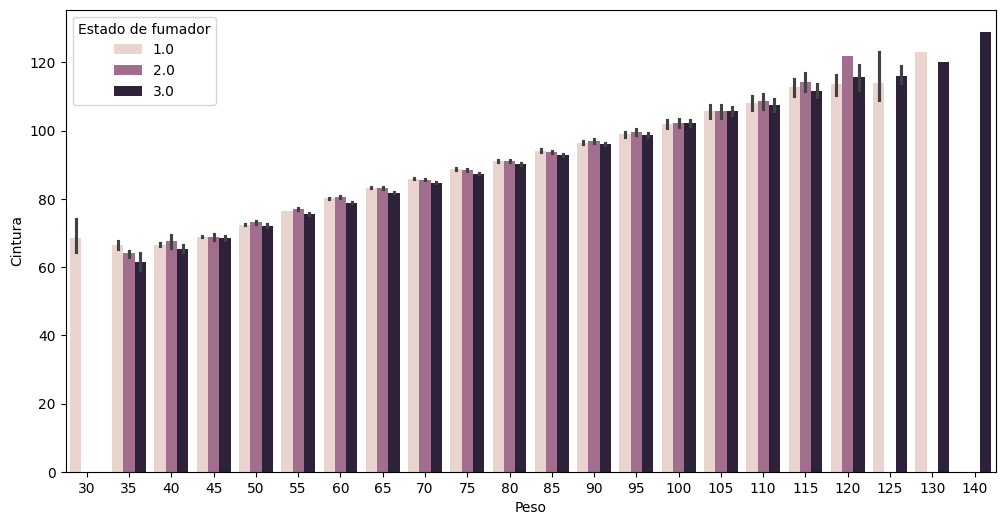

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(y='Cintura',x='Peso',hue='Estado de fumador',data=df)

**GRAFICO 4 -¿Cual es la media del peso de los pacientes segun el sexo?**

<Axes: xlabel='Sexo', ylabel='Peso'>

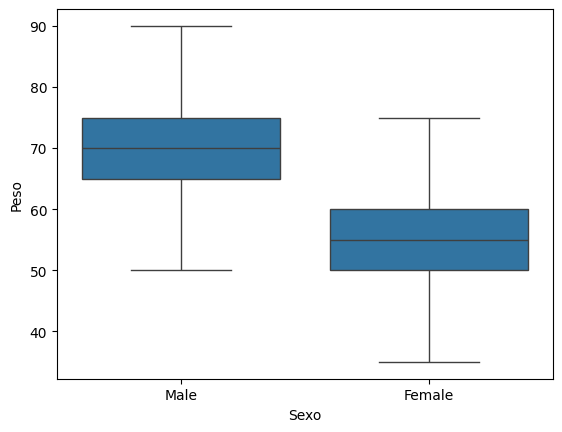

In [ ]:
plt.figure()
sns.boxplot(data = df,
            x = 'Sexo',
            y = 'Peso',
            showfliers = False)

**EL PROMEDIO DE PESO ES DE 55 EN EL SEXO FEMENINO, 70 EN EL SEXO MASCULINO.**

**PASO 5 - BUSCANDO VALORES PERDIDOS**

In [ ]:
nun_missing = (df[['Colest_HDL','Colest_LDL','Trigliceridos','Hemoglobina']] == 0).sum()
print(nun_missing)

Colest_HDL       0
Colest_LDL       0
Trigliceridos    0
Hemoglobina      0
dtype: int64


**NO SE REGISTRAN VALORES PERDIDOS EN EL DATASET**